<a href="https://colab.research.google.com/github/pauloricardofagundes/MVP-Machine-Learning-e-Analytics/blob/main/MVP_MachineLearning%26Analytics_CartCredito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP - Análise de Dados e Boas Práticas**

## 1. O Projeto

Neste projeto, o dataset escolhido foi um relatório de transações por cartão de crédito de uma adminstradora americana, no **primeiro** semestre de 2019.

Devido ao tamanho do arquivo original, foi necessário dividi-lo, salvar os conjuntos no respositório do github e refazer essa união dos dados via python com um loop para leitura dos datasets.

Este dataset possui 25 campos, porém serão utilizados os 12 mais importantes pra essa análise e seus atributos são:

1. trans_date_trans_time:	Data e hora da transação
2. category:	Categoria do Estabelecimento
3. amt:	Valor da Compra
4. first:	Primeiro Nome
5. last:	Sobrenome
6. gender:	Genero
7. city:	Cidade
8. state:	Estado
9. city_pop:	População da Cidade
10. job:	Profissão
11. dob:	Data de Nascimento
12. is_fraud:	Classificação de fraude


## 2. Importando o Dataset e verificando os dados

In [ ]:
## Carregamento de Bibliotecas

    # Manipula data frame
import pandas as pd
import numpy as np
import calendar
#import datetime
from datetime import datetime, date

    # Construção de Gráficos
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Lista de datasets a serem utilizados para consolidar o arquivo final
    # Dados se referem a uso de cartão de crédito durante o primeiro semestre de 2019
Databases = {'https://raw.githubusercontent.com/pauloricardofagundes/MVP/main/credit_card_transactions_1.csv',
             'https://raw.githubusercontent.com/pauloricardofagundes/MVP/main/credit_card_transactions_2.csv',
             'https://raw.githubusercontent.com/pauloricardofagundes/MVP/main/credit_card_transactions_3.csv',
             'https://raw.githubusercontent.com/pauloricardofagundes/MVP/main/credit_card_transactions_4.csv'}

## Leitura dos datasets da lista e consolida todos em um único dataset
df_list = []

Campos_uteis = ['trans_date_trans_time', 'category', 'amt', 'first', 'last', 'gender', 'city', 'state', 'city_pop', 'job', 'dob', 'is_fraud']

for filename in sorted(Databases):
    df_list.append(pd.read_csv(filename,header=None, low_memory=False).set_index(0))
full_df = pd.concat(df_list)

## Remove linha com cabeçalho numérico criado pela função append
full_df = full_df.rename(columns=full_df.iloc[0]).drop(full_df.index[0])

## Filtrando colunas que serão utilizadas nas análises
full_df = full_df[Campos_uteis]

In [ ]:
## Conferindo valores nulos das colunas
full_df.isnull().sum()

,0
trans_date_trans_time,0
category,0
amt,0
first,0
last,0
gender,0
city,0
state,0
city_pop,0
job,0


In [ ]:
## Resumo estatístico do Dataset final
full_df.describe()

,trans_date_trans_time,category,amt,first,last,gender,city,state,city_pop,job,dob,is_fraud
count,371999,371999,371999.00,371999,371999,371999,371999,371999,371999,371999,371999,371999
unique,366513,14,50363.00,341,472,2,859,51,1667,481,922,4
top,2019-04-22 16:02:01,gas_transport,1.25,Christopher,Smith,F,Birmingham,TX,606,Film/video editor,1977-03-23,0
freq,4,37860,129.00,7825,8306,203512,1616,27154,1200,2794,1576,277387


In [ ]:
## Conferindo os tipos de cada atributo
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 371999 entries, 0 to 371998
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   trans_date_trans_time  371999 non-null  object
 1   category               371999 non-null  object
 2   amt                    371999 non-null  object
 3   first                  371999 non-null  object
 4   last                   371999 non-null  object
 5   gender                 371999 non-null  object
 6   city                   371999 non-null  object
 7   state                  371999 non-null  object
 8   city_pop               371999 non-null  object
 9   job                    371999 non-null  object
 10  dob                    371999 non-null  object
 11  is_fraud               371999 non-null  object
dtypes: object(12)
memory usage: 36.9+ MB


Ao final deste primeiro processo, observo que neste database não temos valores nulos nas colunas que serão utilizadas. Todos os campos estão no formato object e os campos numéricos poderão ser convertidos conforme a necessidade de cada utilização.

## 3. Transformando os Dados

Transformando os campos de data (Data de Transação e Data de Nascimento) e valor em formatos que serão úteis nos agrupamentos necessários para as análises

In [ ]:
## Separação de campos para Mês e Hora da transação
full_df['trans_date_trans_time'] = pd.to_datetime(full_df['trans_date_trans_time'], format="%Y-%m-%d %H:%M:%S", dayfirst=True)
full_df['Mes'] = full_df['trans_date_trans_time'].dt.strftime('%b/%y')
full_df['Hora'] = full_df['trans_date_trans_time'].dt.strftime('%H')

## Cálculo da Idade por meio do campo de data de nascimento
hoje = date.today()
full_df["Idade"] = (pd.Timestamp(hoje)
                 - pd.to_datetime(full_df["dob"], format="%Y-%m-%d", dayfirst=True)
                  ) // pd.Timedelta(days=365.2425)

## Função para atriuir faixa etária
def atribui_aging(age):
    if 0 <= age <= 25:
        return '0-25'
    elif 26 <= age <= 35:
        return '26-35'
    elif 36 <= age <= 45:
        return '36-45'
    elif 46 <= age <= 55:
        return '46-55'
    elif 55 <= age <= 65:
        return '56-65'
    elif 66 <= age <= 75:
        return '66-75'
    else:
        return '>75'

## Cria nova coluna com a faixa etaria da idade
full_df['Aging'] = full_df['Idade'].apply(atribui_aging)
## Cria nova coluna com o dia da semana da transação e substitui os nomes em inglês para abreviação em português
full_df['d_semana'] = full_df['trans_date_trans_time'].dt.day_name()
full_df['d_semana'] = np.where(full_df['d_semana'] == "Sunday", "Dom",
                               np.where(full_df['d_semana'] == "Monday", "Seg",
                                        np.where(full_df['d_semana'] == "Tuesday", "Ter",
                                                 np.where(full_df['d_semana'] == "Wednesday", "Qua",
                                                          np.where(full_df['d_semana'] == "Thursday", "Qui",
                                                                   np.where(full_df['d_semana'] == "Friday", "Sex",
                                                                            np.where(full_df['d_semana'] == "Saturday", "Sáb","-")))))))
print(full_df)

## Conversão do campo 'Idade' (valor da compra) para integer
full_df['Idade'] = pd.to_numeric(full_df["Idade"], errors='coerce', downcast="integer")
## Conversão do campo 'amt' (valor da compra) de string para float
full_df['amt'] = pd.to_numeric(full_df["amt"], errors='coerce', downcast="float")
## Conversão do campo 'is_fraud' (valor da compra) de string para integer
full_df['is_fraud'] = pd.to_numeric(full_df["is_fraud"], errors='coerce', downcast="integer")

       trans_date_trans_time        category     amt      first     last  \
0                                                                          
0        2019-01-01 00:00:18        misc_net    4.97   Jennifer    Banks   
1        2019-01-01 00:00:44     grocery_pos  107.23  Stephanie     Gill   
2        2019-01-01 00:00:51   entertainment  220.11     Edward  Sanchez   
3        2019-01-01 00:01:16   gas_transport    45.0     Jeremy    White   
4        2019-01-01 00:03:06        misc_pos   41.96      Tyler   Garcia   
...                      ...             ...     ...        ...      ...   
371994   2019-06-21 14:05:29   personal_care   43.06   Jennifer   Garcia   
371995   2019-06-21 14:05:45    shopping_pos  116.37      Kathy   Hughes   
371996   2019-06-21 14:06:29  health_fitness   73.89       John   Miller   
371997   2019-06-21 14:06:45  health_fitness   94.83     Alicia  Morales   
371998   2019-06-21 14:06:54    shopping_pos    6.75      Tammy    Davis   

       gend

## 4. Construção dos Gráficos

Nesta seção, serão apresentados os gráficos com análises dos dados que compões este dataset.

In [ ]:
## Definindo cores padrões que serão utilizadas nos gráficos
color_1 = '#009999' ## Variável da cor nº1 padrão dos gráficos
color_2 = '#009999' ## Variável da cor nº2 padrão dos gráficos

### 4.1. Quantidade de Transações por Estado
####     Dados apresentados em gráfico de barras e ordenado por grandeza.

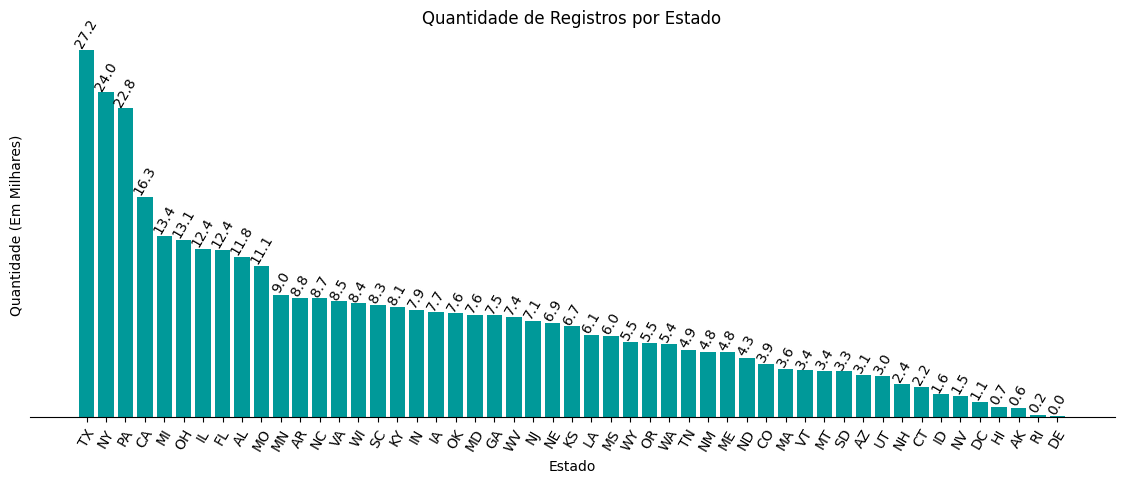

In [ ]:
## Gráfico de barras verticais, com a quantidade de transações registradas por estado dos EUA.
df_estado = (full_df.groupby(['state']).size().reset_index(name='counts')).sort_values(['counts'],ascending=False)
fig, ax = plt.subplots(figsize=(14,5))
ax.bar(x=df_estado['state'], height=df_estado['counts']/1000,color=color_1)
ax.bar_label(ax.containers[0], fmt='{:,.1f}',rotation= 60)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.get_yaxis().set_ticks([])
plt.xticks(rotation=60)
plt.title('Quantidade de Registros por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade (Em Milhares)')
plt.show()

O estado dos EUA com maior número de transações foi o Texas, seguido por Nova Iorque.

### 4.2. Quantidade de Transações por Categoria
####     Dados apresentados em gráfico de barras horizontais e ordenado por grandeza.

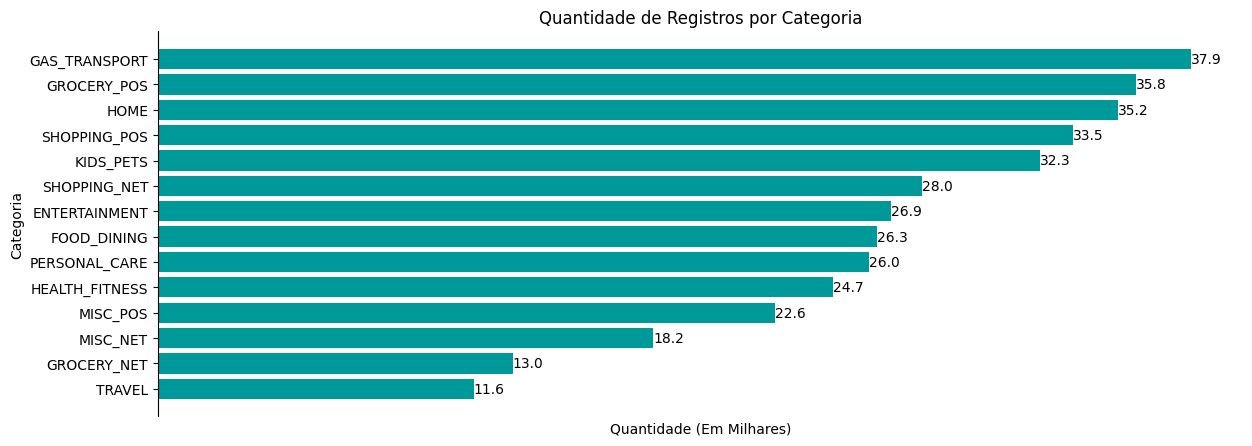

In [ ]:
## Gráfico de barras horizontais com a quantidade de transações registradas por categoria de estabelecimento
df_categoria_qtd = (full_df.groupby(['category']).size().reset_index(name='counts')).sort_values(['counts'],ascending=True)
fig, ax = plt.subplots(figsize=(14,5))
ax.barh(y=df_categoria_qtd['category'].str.upper(), width=df_categoria_qtd['counts']/1000,color=color_1)
ax.bar_label(ax.containers[0], fmt='{:,.1f}',rotation= 0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_ticks([])
plt.xticks(rotation=0)
plt.title('Quantidade de Registros por Categoria')
plt.ylabel('Categoria')
plt.xlabel('Quantidade (Em Milhares)')
plt.show()

A categoria com maior número de transações foi a de "GAS_TRANSPORT".

### 4.3. Valor Médio por Transação de cada Categoria
####     Dados apresentados em gráfico de barras horizontais e ordenado por grandeza.

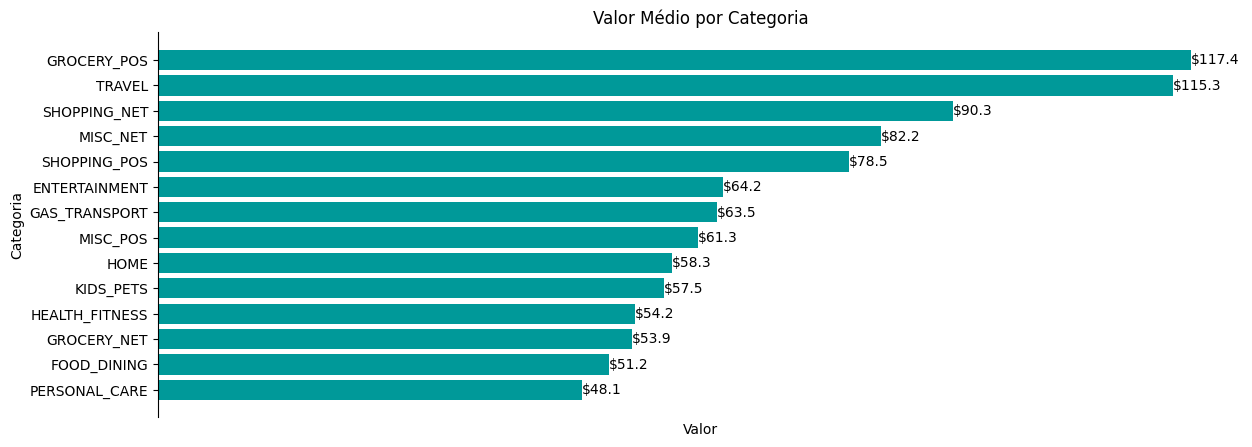

In [ ]:
## Gráfico de barras horizontais, com o valor médio gasto em cada cateroria de estabelecimento
df_categoria_vlr = (full_df.groupby('category')['amt'].mean().reset_index(name='mean')).sort_values(['mean'],ascending=True)
fig, ax = plt.subplots(figsize=(14,5),)
ax.barh(y=df_categoria_vlr['category'].str.upper(), width=df_categoria_vlr['mean'],color=color_1)
ax.bar_label(ax.containers[0], fmt='${:1.1f}',rotation= 0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_ticks([])
plt.xticks(rotation=0)
plt.title('Valor Médio por Categoria')
plt.ylabel('Categoria')
plt.xlabel('Valor')
plt.show()

Verificamos com este gráfico que "Supermercado (Grocery_Pos)" é a categoria que apresenta o maior valor médio de transação.


### 4.4. Proporção de Fraudes
####     Dados apresentados em gráfico de pizza

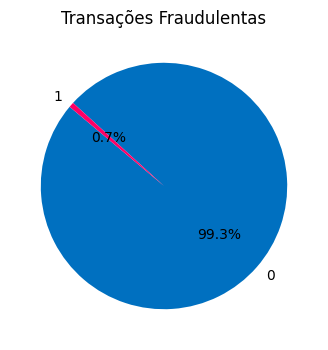

In [ ]:
## Contagem de transações por tipo de marcação do campo "is_fraud"
gender_counts = full_df['is_fraud'].value_counts()

## Montagem do Gráico
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['#0070C0','#FF0066'], startangle=140)
plt.title('Transações Fraudulentas')
plt.show()

Verificamos com este gráfico que o percentual de casos de fraude neste dataset é de apenas 0,7%.


### 4.5. Perfil de Fraude | Gênero x Faixa Etária
####     Dados apresentados em gráfico de colunas empilhadas

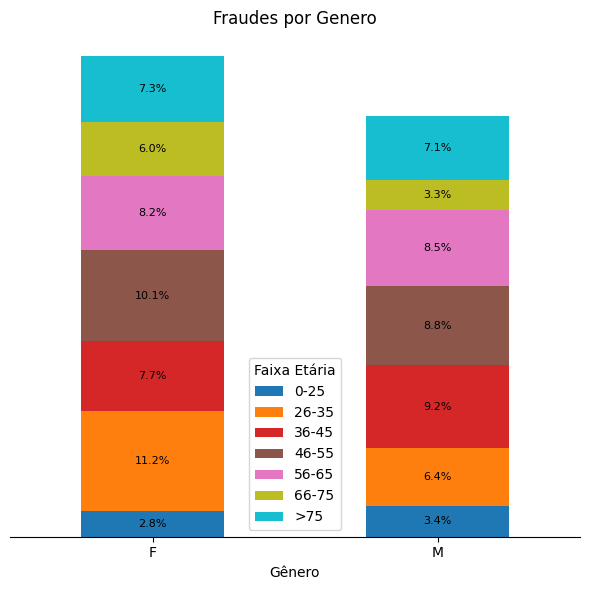

In [ ]:
## Criando gráfico de colunas empilhadas com segmentação de fraudes por gênero e faixa etária

# Preparação do Dataset
df_fraude = full_df[(full_df['is_fraud'] == 1)] # Filtrando apenas registros com marcação de fraude verdadeiro

df_fraude_2 = df_fraude[['gender', 'Aging', "Idade"]] # Criando um sub dataset apenas com os campos que serão úteis
df_fraude_2 = df_fraude_2.groupby(['gender','Aging'])['Idade'].count().reset_index() # Agrupando os dados por faixa etária de cada gênero
df_fraude_2 = df_fraude_2.rename(columns={'Idade': 'cont_aging'}) # Renomeando coluna de contagem do agrupamento
df_fraude_2['%'] = round(100 * df_fraude_2['cont_aging'] / df_fraude_2['cont_aging'].sum(),1) # Criando coluna com percentual

#Plotando o gráfico
pivot_table = df_fraude_2.pivot_table(index='gender', columns='Aging',values='%', fill_value=0)
fig, ax = plt.subplots(figsize=(6, 6))
pivot_table.plot(kind='bar', stacked=True, ax=ax, colormap='tab10')

# Adicionando os rótulos
for c in ax.containers:
    labels = [str(round(v.get_height(), 1)) + '%' if v.get_height() > 0 else '' for v in c]
    ax.bar_label(c,
                 label_type='center',
                 labels = labels,
                 size = 8)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_xlabel('Gênero')
ax.set_ylabel('% de Transações')
ax.set_title('Fraudes por Genero')
ax.legend(title='Faixa Etária')
plt.xticks(rotation=0)
ax.get_yaxis().set_visible(False)
plt.tight_layout()
plt.show()

Verificamos aqui que os maiores registros de fraude foram registrados para o público feminino e com idade entre 26 e 35 anos.

Já dentre o público masculino, a maior ocorrência é entre o público entre 36 e 45 anos.

As menores ocorrências dentre o público feminino ocorreu entre pessoas de até 25 anos e no público masculino na faixa de 66 a 75 anos.



### 4.6. Comportamento de Fraude | Horário
####     Dados apresentados em gráfico de colunas linhas

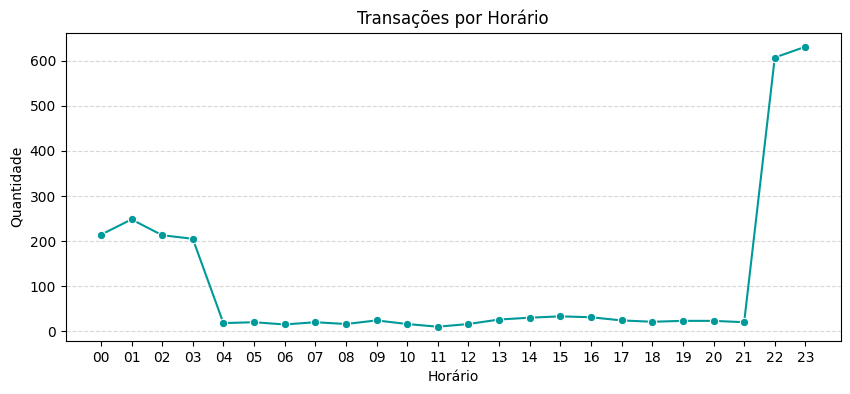

In [ ]:
## Gráfico de Linha com a curva de registros de fraude

Horario = df_fraude.groupby('Hora')['is_fraud'].count().reset_index() # Agrupando o dataset de fraude por horario da ocorrência

# Plotando o Gráfico
plt.figure(figsize=(10, 4))
sns.lineplot(data=Horario, x='Hora', y='is_fraud', marker='o', color=color_1)

# Atribuindo Rótulos
plt.title('Transações por Horário')
plt.xlabel('Horário')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(range(0, 24))
plt.show()

Neste exemplo, é possível observar que o principal horário em que as transações fraudulentas ocorrem é entre 22h e 23h, se extendendo com um alto volume pela madrugada até 3h, quando os registros são reduzidos e mantém um comportamento sem grandes variações durante todo o restante do dia.

### 4.7. Quantidade de Transações Fraudulentas por Categoria
####     Dados apresentados em gráfico de barras horizontais e ordenado por grandeza.

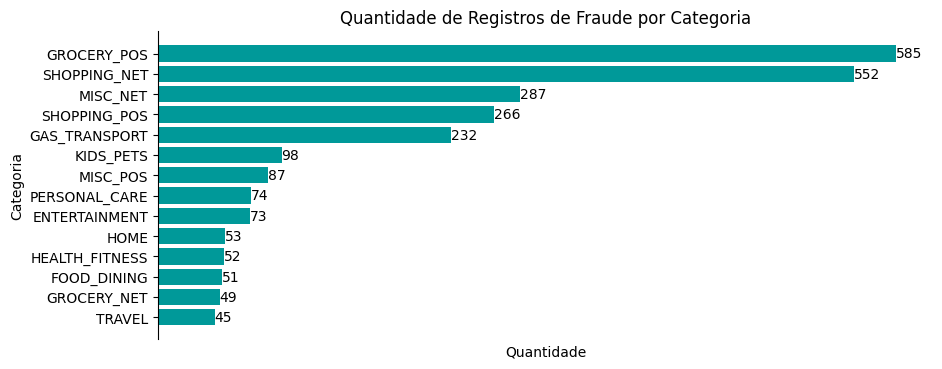

In [ ]:
## Gráfico de barras horizontais com a quantidade de transações registradas por categoria de estabelecimento

df_categoria_qtd = (df_fraude.groupby(['category']).size(). \
                    reset_index(name='counts')). \
                    sort_values(['counts'],ascending=True) # Agrupando o dataset de fraude por categoria

# Plotando o gráfico
fig, ax = plt.subplots(figsize=(10,4))
ax.barh(y=df_categoria_qtd['category'].str.upper(), width=df_categoria_qtd['counts'],color=color_1)
ax.bar_label(ax.containers[0], fmt='{:,.0f}',rotation= 0)

# Ajustando o visual e adicionando rótulos
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.get_xaxis().set_ticks([])
plt.xticks(rotation=0)
plt.title('Quantidade de Registros de Fraude por Categoria')
plt.ylabel('Categoria')
plt.xlabel('Quantidade')
plt.show()

Nesta visualização, as categorias de estabelecimento "Grossery_Pos" e "Shopping_Net" se mostram como as que mais registraram transações fraudulentas durante o período analisado

### 4.8. Quantidade de Transações Fraudulentas por Dia da Semana
####     Dados apresentados em gráfico de barras

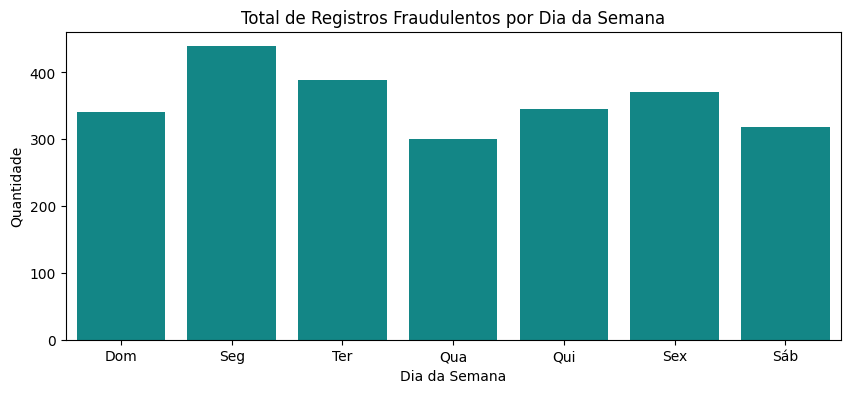

In [ ]:
## Gráfico de barras demonstrando a quantidade de transações fraudulentas por dia da semana
day_spending = df_fraude.groupby('d_semana')['is_fraud'].count().reindex(['Dom','Seg', 'Ter', 'Qua', 'Qui', 'Sex', 'Sáb'])

plt.figure(figsize=(10, 4))
sns.barplot(data=day_spending.reset_index(), x='d_semana', y='is_fraud', color= color_1)
plt.title('Total de Registros Fraudulentos por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Quantidade')
plt.show()

Concluímos que os 3 dias com maior incidência de fraude são Segunda, Terça e Sexta-Feira, respectivamente nesta ordem.

## 5. Conclusão

Neste dataset, foi possível observar alguns pontos interessantes sobre o comportamento de transações por cartão de crédito de uma administradora dos EUA no primeiro semestre de 2019. Os pontos escolhidos para serem observados aqui foram:



1.   O estado que mais apresentou transações foi o Texas, seguido por Nova Iorque;
2.   Os segmentos de estabelecimentos que mais registraram transações foi o de transporte de gás e supermercados;
3.   Os maiores valores médios de compra foram registrados nos segmentos de supermercados com 117 dólares e de viagens com 115 dólares;
4.   Filtrando apenas os casos de fraude, podemos observar que o volume de transações marcadas com essa opção foi relativamente baixo, representando apenas 0,7% do total de registros deste dataset;
5.   Deste grupo de transações fraudulentas, o gênero que apresentou maior número de ocorrências foi o feminino;
6.   O período de maior incidencia de fraude, ocorreu entre 22h e 03h, com pico às 23h;
7.   Os segmentos que mais registraram fraudes, foram o de supermercados e compras online;
8.   Os dias em que mais se registram fraudes são segunda, terça e sexta-feira, respectivamente.